In [2]:
#For getting a Realtime Data From the Yahoo Finance 
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
#To get a Data from Website using YFinance Library
import yfinance as yf

msft = yf.Ticker("SI=F")

# get the historical market data Specific Date
hist = msft.history(start="2020-01-01", end="2023-12-31")

In [4]:
import pandas as pd

In [5]:
#To get a CSV File 
hist.to_csv('Silver.csv')

In [6]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,17.966000,17.990000,17.966000,17.966000,2,0.0,0.0
2020-01-03 00:00:00-05:00,18.110001,18.110001,17.965000,18.068001,83,0.0,0.0
2020-01-06 00:00:00-05:00,18.025000,18.105000,18.025000,18.097000,3,0.0,0.0
2020-01-07 00:00:00-05:00,18.014999,18.344999,18.014999,18.316000,33,0.0,0.0
2020-01-08 00:00:00-05:00,18.400000,18.504999,18.070000,18.087999,31,0.0,0.0


In [7]:
df1 = hist.reset_index()['Close']

In [8]:
df1.shape

(788,)

In [9]:
import matplotlib.pyplot as plt

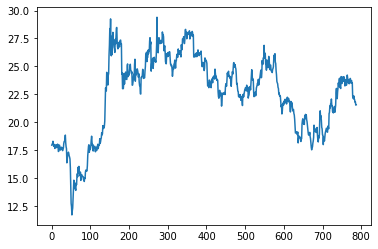

In [10]:
plt.plot(df1)

In [11]:
#LSTM are sensitive to the scale of the data. So we apply MinMaxSCaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler(feature_range=(0,1))

df1 = Scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
#Splitting Dataset into Train and Test Split

In [15]:
Training_Size = int(len(df1)*0.80)
Test_Size = len(df1) - Training_Size
Train_data , Test_data = df1[0:Training_Size,:] , df1[Training_Size:len(df1),:1]

In [16]:
Training_Size , Test_Size

(630, 158)

In [17]:
#Converting An Array Of Value into A Dataset Matrix
import numpy
def create_dataset(dataset, time_step = 1):
    dataX , dataY = [] , []
    for i in range(len(dataset)-time_step-1):
      a = dataset[i:(i+time_step), 0 ]
      dataX.append(a)
      dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX) , numpy.array(dataY)

In [18]:
#reshape into X=t t+1 t+2 t+3 t+4 and y=t+5
time_step=100
X_Train , Y_Train = create_dataset(Train_data,time_step)
X_Test , Y_Test = create_dataset(Test_data,time_step)

In [19]:
#Print the 4 timeStep Features Array Value
print(X_Train)

[[0.35277131 0.35854616 0.36018797 ... 0.31704688 0.33567342 0.33006853]
 [0.35854616 0.36018797 0.37258676 ... 0.33567342 0.33006853 0.33691903]
 [0.36018797 0.37258676 0.35967838 ... 0.33006853 0.33691903 0.34875165]
 ...
 [0.621412   0.60238916 0.60805073 ... 0.52635449 0.53111017 0.53354471]
 [0.60238916 0.60805073 0.64207665 ... 0.53111017 0.53354471 0.51304992]
 [0.60805073 0.64207665 0.64881387 ... 0.53354471 0.51304992 0.50574642]]


In [20]:
print(X_Train.shape) , print(Y_Train.shape)

(529, 100)
(529,)


(None, None)

In [21]:
print(X_Test.shape) , print(Y_Test.shape)

(57, 100)
(57,)


(None, None)

In [22]:
#reshape input to  be [Sample , TimeStep ,Features] Which is required for LSTM 
X_Train = X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1)
X_Test = X_Test.reshape(X_Test.shape[0],X_Test.shape[1],1)

In [23]:
#Create a The Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_Train,Y_Train,validation_data=(X_Test,Y_Test), epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 22s 819ms/step - loss: 0.1964 - val_loss: 0.0367
Epoch 2/100
9/9 [==============================] - 2s 195ms/step - loss: 0.0239 - val_loss: 0.0138
Epoch 3/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0120 - val_loss: 0.0134
Epoch 4/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0101 - val_loss: 0.0026
Epoch 5/100
9/9 [==============================] - 2s 286ms/step - loss: 0.0079 - val_loss: 0.0043
Epoch 6/100
9/9 [==============================] - 2s 248ms/step - loss: 0.0070 - val_loss: 0.0024
Epoch 7/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 8/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0063 - val_loss: 0.0026
Epoch 9/100
9/9 [==============================] - 2s 195ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 10/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 11

In [27]:
import tensorflow as tf

In [28]:
#let do the prediction and check the performance metrics
Train_Predict = model.predict(X_Train)
Test_Predict = model.predict(X_Test)

2/2 [==============================] - 0s 54ms/step


In [29]:
#Transform to original form
Train_Predict = Scaler.inverse_transform(Train_Predict)
Test_Predict = Scaler.inverse_transform(Test_Predict)

In [30]:
#Calculate RMSE Performance Metric
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_Train,Train_Predict))

23.383009014321456

In [31]:
#Test Data RMSE
math.sqrt(mean_squared_error(Y_Test,Test_Predict))

22.398532006983164

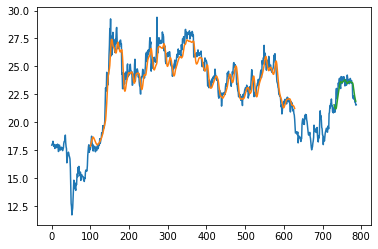

In [32]:
#Plotting

#shift train predictions for plotting

look_back=100

trainPredictPlot = numpy.empty_like(df1)

trainPredictPlot[:, :] = np.nan # plot baseline and predictions

trainPredictPlot[look_back: len(Train_Predict)+look_back, ] = Train_Predict

#shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]= numpy.nan
testPredictPlot [len(Train_Predict)+(look_back*2)+1:len (df1)-1,] = Test_Predict

plt.plot(Scaler.inverse_transform(df1))

plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)

plt.show()
#Orange is Train Predict Data
#Green is Test Predict Data

In [33]:
len(Test_data)

158

In [34]:
X_Input = Test_data[58:].reshape(1,-1)

In [35]:
X_Input.shape

(1, 100)

In [36]:
temp_input = list(X_Input)
temp_input = temp_input[0].tolist()

In [42]:
lst_output=[]

n_steps=100 
i = 0

while (i < 30) :

  if(len(temp_input)>100):

    #print(temp_input)

    x_input=np.array(temp_input[1:])

    print("{} day input {}".format(i,x_input))

    x_input=x_input.reshape(1,-1)

    x_input = x_input.reshape((1, n_steps, 1)) 

    #print(x_input)

    yhat = model.predict(x_input, verbose=0)

    print("{} day output {}".format(i,yhat))

    temp_input.extend(yhat[0].tolist())

    temp_input=temp_input[1:]

    #print(temp_input)

    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    X_Input = X_Input.reshape((1, n_steps,1)) 
    yhat = model.predict(X_Input, verbose=0) 
    print(yhat[0]) 
    temp_input.extend(yhat[0].tolist()) 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)

[0.5647845]
101
1 day input [0.36924644 0.39976218 0.38928834 0.4090471  0.4973107  0.52663763
 0.49504614 0.50161349 0.47879744 0.44278999 0.43548661 0.4044047
 0.40327236 0.35554545 0.3928551  0.38702367 0.3737191  0.39240221
 0.4137462  0.42116286 0.43050448 0.4384872  0.43837403 0.41963422
 0.41838872 0.44941404 0.44528111 0.43599619 0.51265361 0.51876808
 0.55154838 0.54141426 0.56287153 0.56111644 0.58636691 0.55279399
 0.55307702 0.52199511 0.52318404 0.51599393 0.52646777 0.54475458
 0.54860437 0.51944741 0.53609241 0.55568131 0.61722238 0.63992525
 0.59242479 0.588122   0.62135531 0.64134062 0.66806315 0.65022923
 0.68312292 0.69133209 0.64502066 0.64632275 0.63941567 0.69971123
 0.69637091 0.66472284 0.68102811 0.69665405 0.67530995 0.69880534
 0.68657641 0.6977297  0.68261334 0.65238063 0.68431185 0.6780841
 0.66647793 0.65628711 0.6866331  0.70746762 0.69121892 0.66778012
 0.68046194 0.68476474 0.66336406 0.67451734 0.68527432 0.69042631
 0.66761026 0.6742909  0.68012222 0.

In [44]:
Day_New = np.arange(1,101)
Day_Pred = np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt 

In [46]:
len(df1)

788

In [47]:
df3 = df1.tolist()
df3.extend(lst_output)

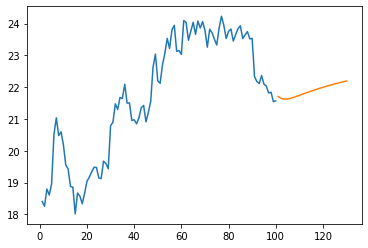

In [48]:
plt.plot(Day_New,Scaler.inverse_transform(df1[688:]))
plt.plot(Day_Pred,Scaler.inverse_transform(lst_output))